#### Perform clustering (K means clustering) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.
##### Dataset Name  - EastWestAirlines.xlsx


In [20]:
## Importing all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
## Load the dataset

data = pd.read_excel("D:/TopMentor_DS_course/5. Clustering - Capstone Project 3/EastWestAirlines.xlsx")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
print("Columns in the Datasets: ", data.columns)

Columns in the Datasets:  Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


In [15]:
print("Shape of the Dataset: ", data.shape)
print()
print("Information of Dataset")
print("====================================================")
data.info()

Shape of the Dataset:  (3999, 12)

Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [16]:
print("Null Values in the Datsets: ", data.isnull().sum())

Null Values in the Datsets:  ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [18]:
## ID is unique and not useful for clustering.

data = data.drop(['ID#'], axis=1)

### Feature Scaling
##### K-Means uses distance (Euclidean distance).
If one feature (like Balance) is large and another is small (Award 0/1), the large one dominates.

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#### Find Optimal Number of Clusters (Elbow Method)

In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

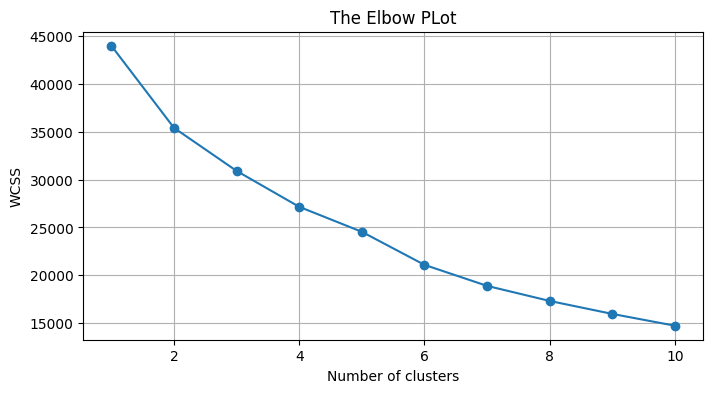

In [25]:
## The Elbow Plot

plt.figure(figsize=(8,4))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title("The Elbow PLot")
plt.grid(True)
plt.show()

In [43]:
## Apply KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
data['Cluster'].unique()

array([1, 2, 3, 0])

In [45]:
## Analyze Clusters

cluster_summary = data.groupby('Cluster').mean().round(2)
cluster_summary

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,138061.40,78.80,3.47,1.00,4.07,93927.87,28.07,506.67,1.60,4613.87,0.53
1,43793.92,97.44,1.22,1.02,1.00,4700.69,6.92,198.62,0.62,3691.56,0.20
2,116817.34,154.76,3.70,1.00,1.00,39216.20,18.76,334.36,1.00,4893.49,0.65
3,191573.73,775.86,2.17,1.04,1.00,31412.16,26.78,5365.67,15.64,4665.83,0.81


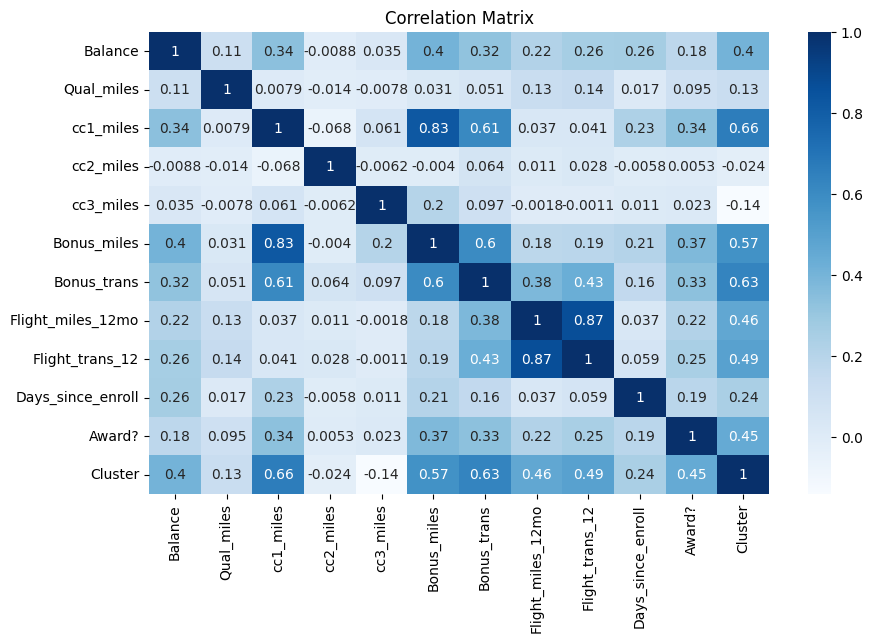

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

##### To measure the Performance of the Clusters  - We use a method called as Silhouette Score
Measures how well each point fit into its assigned cluster. It ranges from -1 to 1
 + 1  - Well matched
 0  - on the boundary
 - 1 - misclassified
Higher the better  - well seperated and tight clusters

In [46]:
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(scaled_data, clusters)

print(f"Silhouette Score for Kmeans is {sil_kmeans}")

Silhouette Score for Kmeans is 0.30918774313627845


In [49]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1
